In [1]:
# ========================================================
# 1️. Import Library
# ========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os


In [2]:
# ========================================================
# 2️. Extract ZIP Dataset 
# ========================================================
zip_path = "titanic.zip"  
extract_folder = "titanic_data"

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print(f"Dataset berhasil diekstrak ke folder: {extract_folder}")
else:
    print("File zip tidak ditemukan, pastikan path benar.")

Dataset berhasil diekstrak ke folder: titanic_data


In [3]:
# ========================================================
# 3️. Load Dataset
# ========================================================
csv_path = os.path.join(extract_folder, "train.csv") 
df = pd.read_csv(csv_path)

print("5 data teratas:")
display(df.head())

5 data teratas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# ========================================================
# 4️. Info Dataset
# ========================================================
print("\n Informasi Dataset:")
df.info()

print("\n Statistik Deskriptif:")
display(df.describe())


 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 Statistik Deskriptif:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# ========================================================
# 5️. Data Cleaning
# ========================================================
# Cek missing values
print("\n Missing Values per Kolom:")
print(df.isnull().sum())



 Missing Values per Kolom:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Isi missing values
df['Age'].fillna(df['Age'].median(), inplace=True) #isi dengan nilai median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) #isi dengan nilai yang paling banyak muncul
df.drop(columns=['Cabin'], inplace=True)  # dihapus karena terlalu banyak missing


C:\Users\USER\AppData\Local\Temp\ipykernel_10452\4013974827.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10452\4013974827.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [6]:
#cek kembali missing value
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


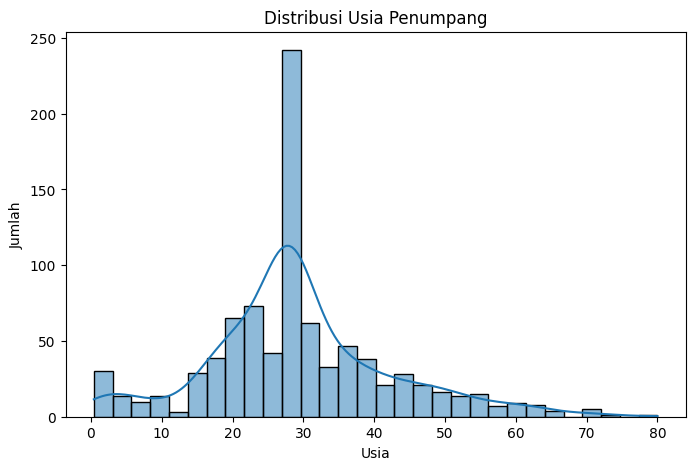

In [7]:
# ========================================================
# 6️. Exploratory Data Analysis (EDA)
# ========================================================

# --- Distribusi Usia ---
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Usia Penumpang')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

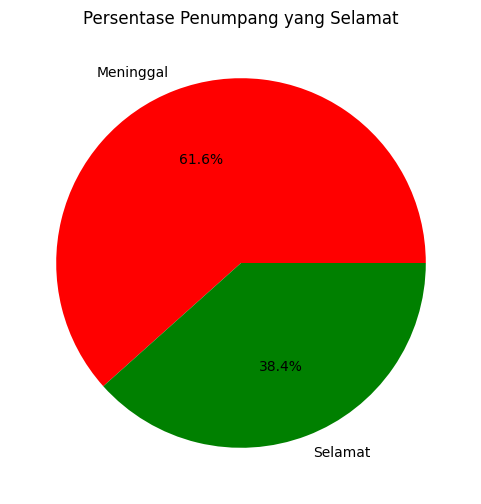

In [8]:
# --- Survival Rate (Pie Chart) ---
plt.figure(figsize=(6, 6))
df['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Meninggal', 'Selamat'], colors=['red', 'green']
)
plt.title('Persentase Penumpang yang Selamat')
plt.ylabel('')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10452\3569669653.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Sex', y='Survived', data=df, ci=None)


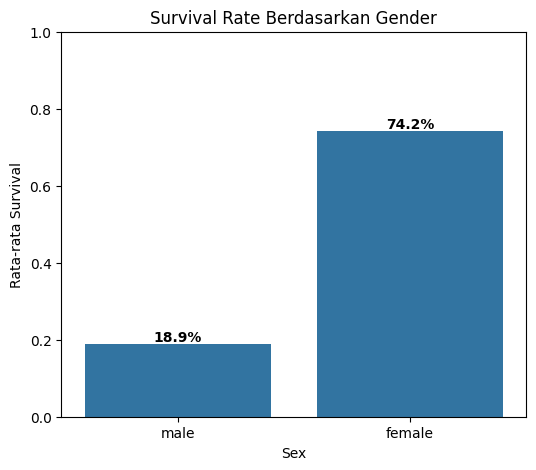

In [16]:
# --- Survival Rate Berdasarkan Gender dengan Persentase ---
plt.figure(figsize=(6, 5))

# Buat barplot
ax = sns.barplot(x='Sex', y='Survived', data=df, ci=None)

# Tambahkan judul & label
plt.title('Survival Rate Berdasarkan Gender')
plt.ylabel('Rata-rata Survival')
plt.ylim(0, 1)  # supaya sumbu Y dari 0 sampai 1 (100%)

# Tambahkan persentase di atas setiap bar
for p in ax.patches:
    percentage = f'{p.get_height()*100:.1f}%'
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, color='black', fontweight='bold'
    )

plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_10452\887771210.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
C:\Users\USER\AppData\Local\Temp\ipykernel_10452\887771210.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(label.get_text())}' for label in ax.get_xticklabels()])


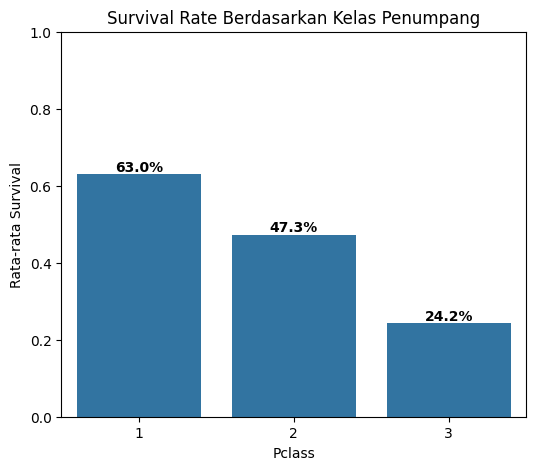

In [18]:
# --- Survival Rate Berdasarkan Kelas Penumpang dengan Persentase ---
plt.figure(figsize=(6, 5))

# Buat barplot
ax = sns.barplot(x='Pclass', y='Survived', data=df, ci=None)

# Ubah label x-axis menjadi "Kelas 1, 2, 3"
ax.set_xticklabels([f'{int(label.get_text())}' for label in ax.get_xticklabels()])

# Tambahkan judul & label
plt.title('Survival Rate Berdasarkan Kelas Penumpang')
plt.ylabel('Rata-rata Survival')
plt.ylim(0, 1)  # sumbu Y dari 0 sampai 1 (100%)

# Tambahkan persentase di atas bar
for p in ax.patches:
    percentage = f'{p.get_height()*100:.1f}%'
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, color='black', fontweight='bold'
    )

plt.show()


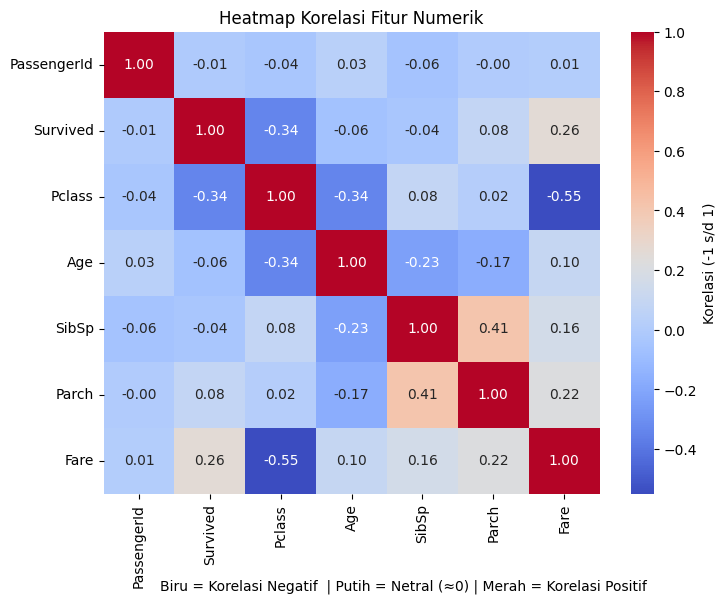

In [19]:
# --- Korelasi Fitur Numerik (Dengan Penjelasan Warna) ---
plt.figure(figsize=(8, 6))

# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Buat heatmap
ax = sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Korelasi (-1 s/d 1)'})
plt.title('Heatmap Korelasi Fitur Numerik')

# Tambahkan label tambahan di bawah heatmap sebagai penjelasan warna
plt.figtext(0.5, -0.05, 
            "Biru = Korelasi Negatif  | Putih = Netral (≈0) | Merah = Korelasi Positif", 
            wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


In [15]:
# ========================================================
# 7️. Insight Singkat dengan Persentase
# ========================================================
total_passengers = len(df)

# 1. Survival Rate Berdasarkan Gender
survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
male_survival = survival_by_gender['male']
female_survival = survival_by_gender['female']

# 2. Survival Rate Berdasarkan Kelas
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
class1_survival = survival_by_class[1]
class3_survival = survival_by_class[3]

# 3. Survival Rate Anak-anak (<10 tahun)
child_survival = df[df['Age'] < 10]['Survived'].mean() * 100

# --- Cetak Insight ---
print("\n💡 Insight Berdasarkan Data:")
print(f"- Wanita memiliki peluang selamat {female_survival:.1f}% dibanding pria {male_survival:.1f}%.")
print(f"- Penumpang kelas 1 memiliki survival rate {class1_survival:.1f}% sedangkan kelas 3 hanya {class3_survival:.1f}%.")
print(f"- Anak-anak (<10 tahun) memiliki survival rate {child_survival:.1f}% dari total anak-anak.")



💡 Insight Berdasarkan Data:
- Wanita memiliki peluang selamat 74.2% dibanding pria 18.9%.
- Penumpang kelas 1 memiliki survival rate 63.0% sedangkan kelas 3 hanya 24.2%.
- Anak-anak (<10 tahun) memiliki survival rate 61.3% dari total anak-anak.
